In [1]:
看看0

'0000000000000000000000000000000000000000000000 文档起始位 00000000000000000000000000000000000000000000000'

In [2]:
from sympy import *

# 预备工作(Preliminaries)

初始化打印环境:

In [3]:
init_printing() 

所有的符号对象自动输出为LaTex形式:

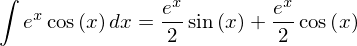

In [4]:
x = symbols('x')
a = Integral(cos(x)*exp(x), x)
Eq(a, a.doit()) 

加快符号对象的输出速度: 直接打印符号对象, 将符号对象输出为字符串的形式;

In [5]:
%P  x; a;; Eq(a, a.doit())

@x>>: x,    @a>>: Integral(exp(x)*cos(x), x),    
@Eq(a, a.doit())>>: Eq(Integral(exp(x)*cos(x), x), exp(x)*sin(x)/2 + exp(x)*cos(x)/2),    


# 介绍(Introduction)

## 什么是符号计算

In [6]:
import math
%C round(math.sqrt(8),3); sympy.sqrt(8)

round(math.sqrt(8),3)  sympy.sqrt(8)
---------------------  -------------
2.828                  2*sqrt(2)    


In [7]:
sympy.sqrt(8) #默认输出符号对象形式,

## 更有趣的例子

In [8]:
from sympy import symbols
x, y = symbols('x y')
expr = x + 2*y
%P expr; expr+1; expr-x; x*expr#不会自动执行化简

@expr>>: x + 2*y,    @expr+1>>: x + 2*y + 1,    @expr-x>>: 2*y,    @x*expr#不会自动执行化简>>: x*(x + 2*y),    


扩展表达式: expend()

In [9]:
from sympy import expand, factor
expanded_expr = expand(x*expr)
%P expanded_expr; factor(expanded_expr)

@expanded_expr>>: x**2 + 2*x*y,    @factor(expanded_expr)>>: x*(x + 2*y),    


## 符号计算的力量

像SymPy这样的符号计算系统(symbolic computation system)的真正强大之处在于能够符号化的(symbolically,象征性地)进行各种计算。SymPy可以简化表达式(simplify)，计算导数(derivatives)，积分和极限(integrals,limits)，求解方程(solve equations)，使用矩阵等等。它还包括用于绘图，打印的模块（如数学公式的2D漂亮打印，或LATEX），代码生成，物理，统计，组合(combinatorics)，数论(number theory)，几何，逻辑等。

In [10]:
x, t, z, nu = symbols('x t z nu')

计算$\sin{(x)}e^x$的导数, 之前的`$\sin{(x)}e^x$`应该写为``\\(\sin{(x)}e^x\\)``?  
注意: 对于一些常见的函数, 要使用**\func**的形式创建LaTex表达式, 即在函数名前试探性的加上反斜线, $sin(x) e^x$.

In [11]:
diff(sin(x)*exp(x))

符号积分: 不定积分

In [12]:
integrate(exp(x)*sin(x) + exp(x)*cos(x), x)

定积分: \\(\int_{-\infty}^\infty \sin{(x^2)}\,dx\\).

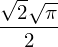

In [13]:
integrate(sin(x**2), (x,-oo,oo))

求极限: $\lim_{x\to 0}\frac{\sin{(x)}}{x}$.

In [14]:
limit(sin(x)/x,x,0)

解$x^2 - 2 = 0$.

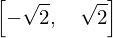

In [15]:
solve(x**2-2,x)

求微分方程: $y'' - y = e^t$.

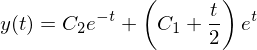

In [16]:
y = Function('y')
dsolve(Eq(y(t).diff(t,t)-y(t),exp(t)), y(t))

求特征值: $\left[\begin{smallmatrix}1 & 2\\ 2 & 2\end{smallmatrix}\right]$.  

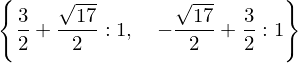

In [17]:
Matrix([[1,2],[2,2]]).eigenvals()

根据球贝塞尔函数$j_\nu(z)$重写贝塞尔函数$J_\nu(z)$;

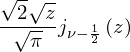

In [18]:
besselj(nu,z).rewrite(jn)

将数学字符串表达式, 转化为LaTex表达式

In [19]:
%P latex(Integral(cos(x)**2,(x,0,pi)))

@latex(Integral(cos(x)**2,(x,0,pi)))>>: \int_{0}^{\pi} \cos^{2}{\left (x \right )}\, dx,    


In [20]:
看看1

'1111111111111111111111111111111111111111111111 文档活动位 11111111111111111111111111111111111111111111111'

# 陷阱(Gotchas)

## 符号对象与变量名的区分

In [21]:
x,y,z = symbols('x y z')


理解SymPy符号和Python变量之间的区别, 对象和对象引用(变量名)的辩证关系:  
* 单词'Symbol'将引用SymPy符号, 单词'variable'将引用Python变量;  
* 地址与地址引用符号关系: 箱子和箱子里的猫的关系;

In [22]:
x = symbols('x') #变量x是一个`符号对象x`的引用变量
expr = x + 1
x 

In [23]:
x = 2 #变量x是一个int对象的引用变量
x

In [24]:
expr #x本是符号对象的引用, 但是半路被其他对象霸占了, 虽然引用丢失了, 但是原始对象还在

In [25]:
x = 'abc'
expr = x + 'def'
expr

'abcdef'

In [26]:
x = 'ABC'
expr

'abcdef'

将符号表达式中的符号变为一个常数值

In [27]:
x = symbols('x')
expr = x + 1
expr.subs(x, 2)

## 等号

In [28]:
x + 1 == 4 #左侧是符号(表达式)对象, 右侧是int对象,永远不可能相等

False

创建符号相等

In [29]:
Eq(x+1,4)

虽然左右两侧都是符号表达式, 而实际上也相等, 但是这两个表达式还是不等?   
两个符号表达式的结构不同;

In [30]:
(x+1)**2 == x**2 + 2*x +1

False

符号表达式的相等性判断不能使用is或者`==`, 而应该使用simplify(a,b)

In [31]:
a = (x + 1)**2
b = x**2 + 2*x + 1
simplify(a - b)

In [32]:
c = x**2 - 2*x + 1
simplify(a - c)
4*x

通过equals测试两个表达式是否相等

In [33]:
a = cos(x)**2 - sin(x)**2
b = cos(2*x)
a.equals(b)

True

## 最后

符号对象加一个整型对象得到一个符号对象

In [34]:
%P Integer(1)+1; type(Integer(1)+1);; type(1+1)

@Integer(1)+1>>: 2,    @type(Integer(1)+1)>>: <class 'sympy.core.numbers.Integer'>,    
@type(1+1)>>: <class 'int'>,    


符号整数相除仍是一个符号对象

In [35]:
%P Integer(1)/Integer(3); type(Integer(1)/Integer(3))

@Integer(1)/Integer(3)>>: 1/3,    @type(Integer(1)/Integer(3))>>: <class 'sympy.core.numbers.Rational'>,    


明确的构造一个有理数符号对象

In [36]:
type(Rational(1,3))

sympy.core.numbers.Rational

In [37]:
%P x+1/2; type(x + 1/2);; x + Rational(1, 2); type(x + Rational(1, 2))

@x+1/2>>: x + 0.5,    @type(x + 1/2)>>: <class 'sympy.core.add.Add'>,    
@x + Rational(1, 2)>>: x + 1/2,    @type(x + Rational(1, 2))>>: <class 'sympy.core.add.Add'>,    


## 基本操作(Basic Operations)

In [38]:
# Printing

# Simplification

# Calculus

# Solvers

# Matrices

# Advanced Expression Manipulation

In [47]:
看看2

'2222222222222222222222222222222222222222222222 文档终止位 22222222222222222222222222222222222222222222222'